# Подключение библиотек

In [1]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyLDAvis

In [3]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

In [5]:
pip freeze

aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiohttp @ file:///C:/b/abs_8860tt1424/croot/aiohttp_1715108828392/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///C:/b/abs_45ba4vacaj/croot/alabaster_1718201502252/work
altair @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/altair_1699497320503/work
anaconda-anon-usage @ file:///C:/b/abs_c3w_h1zzjg/croot/anaconda-anon-usage_1710965204622/work
anaconda-catalogs @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/anaconda-catalogs_1701816586117/work
anaconda-client @ file:///C:/b/abs_34txutm0ue/croot/anaconda-client_1708640705294/work
anaconda-cloud-auth @ file:///C:/b/abs_b02evi84gh/croot/anaconda-cloud-auth_1713991445770/work
anaconda-navigator @ file:///C:/b/abs_d8d4a02c3t/croot/anaconda-navigator_1713464063970/work
anaconda-project @ file:///C:/b/abs_95s0l9dwvd/

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Подключение дата сета

In [7]:
df = pd.read_csv("films250.csv")

In [8]:
df.head(10)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama"
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama"
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama"
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama"
5,Властелин колец: Возвращение короля,2003,3h 21m,Гандальф и Арагорн ведут мир людей против арми...,9.0,"New Zealand, United States","Adventure, Drama, Fantasy"
6,Список Шиндлера,1993,3h 15m,В оккупированной немецкой Поль году во время В...,9.0,United States,"Biography, Drama, History"
7,Криминальное чтиво,1994,2h 34m,"Жизнь двух наемников толпы, боксера, гангстера...",8.9,United States,"Crime, Drama"
8,Властелин колец: Братство кольца,2001,2h 58m,Крутый хоббит из Шира и восемь компаньонов отп...,8.9,"New Zealand, United States, United Kingdom","Adventure, Drama, Fantasy"
9,"Хороший, плохой, злой",1966,2h 41m,Мошенничество на щедрости присоединяется к дву...,8.8,"Italy, Spain, West Germany, United States","Adventure, Western"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Название          250 non-null    object 
 1   Год выпуска       250 non-null    int64  
 2   Длительность      250 non-null    object 
 3   Описание_перевод  250 non-null    object 
 4   Рейтинг           250 non-null    float64
 5   Страна            250 non-null    object 
 6   Жанр              250 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


In [10]:
df.Описание_перевод[8]

'Крутый хоббит из Шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти Средиземье от Темного лорда Саурона.'

### Обработка 

In [11]:
st = '\xa0—'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [12]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [13]:
df['Обработанный текст']= [remove_othersymbol(text.lower()) for text in df.Описание_перевод]

In [14]:
df.head(9)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...
5,Властелин колец: Возвращение короля,2003,3h 21m,Гандальф и Арагорн ведут мир людей против арми...,9.0,"New Zealand, United States","Adventure, Drama, Fantasy",гандальф и арагорн ведут мир людей против арми...
6,Список Шиндлера,1993,3h 15m,В оккупированной немецкой Поль году во время В...,9.0,United States,"Biography, Drama, History",в оккупированной немецкой поль году во время в...
7,Криминальное чтиво,1994,2h 34m,"Жизнь двух наемников толпы, боксера, гангстера...",8.9,United States,"Crime, Drama","жизнь двух наемников толпы, боксера, гангстера..."
8,Властелин колец: Братство кольца,2001,2h 58m,Крутый хоббит из Шира и восемь компаньонов отп...,8.9,"New Zealand, United States, United Kingdom","Adventure, Drama, Fantasy",крутый хоббит из шира и восемь компаньонов отп...


In [15]:
df["Описание_перевод"][8]

'Крутый хоббит из Шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти Средиземье от Темного лорда Саурона.'

In [16]:
df["Обработанный текст"][8]

'крутый хоббит из шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти средиземье от темного лорда саурона.'

In [17]:
russian_stopwords = stopwords.words("russian") 

In [18]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','которые','которых','свой','своём','всем','всё','её','оба','ещё','должный','должные','должных']) 

In [19]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [21]:
%%time
lemm_texts_list = []
for text in (df['Обработанный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лематизированный текст'] = lemm_texts_list

CPU times: total: 5.56 s
Wall time: 5.83 s


In [22]:
df.head(9)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Лематизированный текст
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осудить за уксорицид , образовать дру..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","когда угроза , известный как джокер , наносить..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,ранний жизнь и карьера вить корлеон в 1920 -х ...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,присяжный в суд по дело о убийство в нью -йорк...
5,Властелин колец: Возвращение короля,2003,3h 21m,Гандальф и Арагорн ведут мир людей против арми...,9.0,"New Zealand, United States","Adventure, Drama, Fantasy",гандальф и арагорн ведут мир людей против арми...,гандальф и арагорн вести мир человек против ар...
6,Список Шиндлера,1993,3h 15m,В оккупированной немецкой Поль году во время В...,9.0,United States,"Biography, Drama, History",в оккупированной немецкой поль году во время в...,в оккупировать немецкий поль год в время второ...
7,Криминальное чтиво,1994,2h 34m,"Жизнь двух наемников толпы, боксера, гангстера...",8.9,United States,"Crime, Drama","жизнь двух наемников толпы, боксера, гангстера...","жизнь два наёмник толпа , боксёр , гангстер и ..."
8,Властелин колец: Братство кольца,2001,2h 58m,Крутый хоббит из Шира и восемь компаньонов отп...,8.9,"New Zealand, United States, United Kingdom","Adventure, Drama, Fantasy",крутый хоббит из шира и восемь компаньонов отп...,круть хоббит из шир и восемь компаньон отправи...


In [23]:
df["Лематизированный текст"][8]

'круть хоббит из шир и восемь компаньон отправиться в путешествие , чтобы уничтожить мощный кольцо и спасти средиземье от тёмный лорд саурон .'

In [24]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [25]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Лематизированный текст']]

In [26]:
df.head()

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Лематизированный текст,Токенизированный текст
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осудить за уксорицид , образовать дру...","банкир , осудить уксорицид , образовать дружба..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","когда угроза , известный как джокер , наносить...","угроза , известный джокер , наносить ущерб хао..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,ранний жизнь и карьера вить корлеон в 1920 -х ...,ранний жизнь карьера вить корлеон 1920 -х год ...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,присяжный в суд по дело о убийство в нью -йорк...,присяжный суд дело убийство нью -йорк разочаро...


In [27]:
df["Токенизированный текст"][8]

'круть хоббит шир восемь компаньон отправиться путешествие , уничтожить мощный кольцо спасти средиземье тёмный лорд саурон .'

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

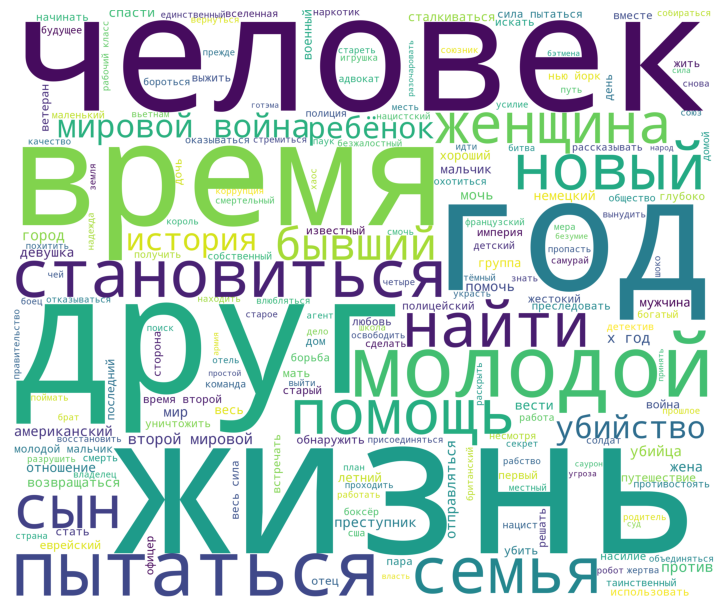

In [30]:
corpus = get_corpus(df['Токенизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [31]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

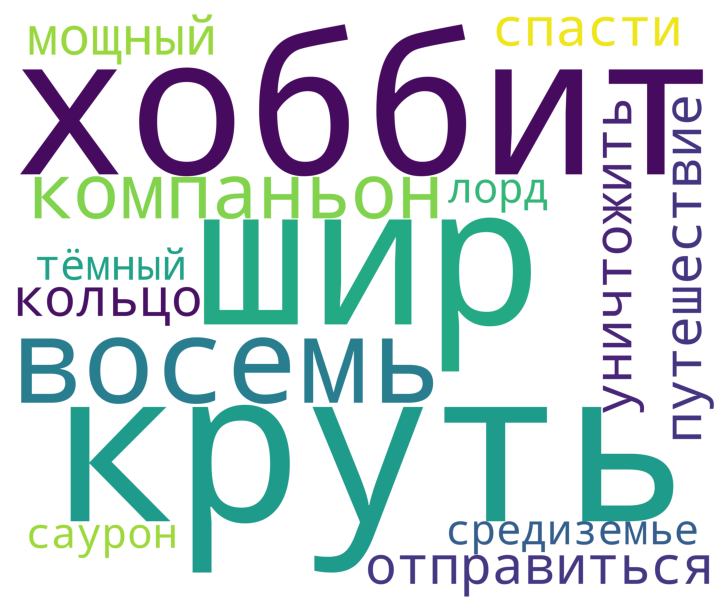

In [32]:
corpus = df['Токенизированный текст'][8]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [33]:
import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Zа-яА-ЯёЁ]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text

In [34]:
df['Токенизированный текст'][8]

'круть хоббит шир восемь компаньон отправиться путешествие , уничтожить мощный кольцо спасти средиземье тёмный лорд саурон .'

In [35]:
cleaned_text = remove_most_common_words(df['Токенизированный текст'][8], 3)
print("Итоговый текст:", cleaned_text)

Итоговый текст: восемь компаньон отправиться путешествие , уничтожить мощный кольцо спасти средиземье тёмный лорд саурон .


In [36]:
df['Токенизированный текст 2'] = [remove_most_common_words(text, 1) for text in df['Токенизированный текст']]

In [37]:
df.head(5)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Лематизированный текст,Токенизированный текст,Токенизированный текст 2
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осудить за уксорицид , образовать дру...","банкир , осудить уксорицид , образовать дружба...","банкир , уксорицид , образовать дружба четверт..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...,патриарх организовать криминальный династия пе...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","когда угроза , известный как джокер , наносить...","угроза , известный джокер , наносить ущерб хао...",", известный джокер , наносить ущерб хаос народ..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,ранний жизнь и карьера вить корлеон в 1920 -х ...,ранний жизнь карьера вить корлеон 1920 -х год ...,жизнь карьера вить корлеон 1920 -х год изображ...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,присяжный в суд по дело о убийство в нью -йорк...,присяжный суд дело убийство нью -йорк разочаро...,суд дело убийство нью -йорк разочаровать член ...


In [38]:
df['Токенизированный текст 2'][8]

'хоббит шир восемь компаньон отправиться путешествие , уничтожить мощный кольцо спасти средиземье тёмный лорд саурон .'

In [39]:
df['Токенизированный текст'][8]

'круть хоббит шир восемь компаньон отправиться путешествие , уничтожить мощный кольцо спасти средиземье тёмный лорд саурон .'

In [40]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['Токенизированный текст 2'])

In [41]:
print("Уникальных значений: ", len(vectorizer.vocabulary_))

Уникальных значений:  2137


In [42]:
print("Ключи: ", (vectorizer.vocabulary_))

Ключи:  {'банкир': 123, 'уксорицид': 1954, 'образовать': 1092, 'дружба': 511, 'четверть': 2064, 'век': 223, 'закалённый': 562, 'сохранять': 1757, 'невиновность': 1017, 'пытаться': 1507, 'оставаться': 1154, 'надежда': 963, 'простой': 1478, 'сострадание': 1754, 'патриарх': 1221, 'организовать': 1142, 'криминальный': 796, 'династия': 476, 'передавать': 1231, 'контроль': 772, 'тайна': 1853, 'империя': 651, 'неохотный': 1045, 'сын': 1848, 'известный': 626, 'джокер': 467, 'наносить': 980, 'ущерб': 1983, 'хаос': 2017, 'народ': 989, 'готэма': 405, 'бэтмена': 208, 'джеймс': 461, 'гордон': 397, 'харви': 2019, 'дента': 441, 'работать': 1513, 'вместе': 259, 'положить': 1321, 'конец': 762, 'безумие': 137, 'жизнь': 540, 'карьера': 714, 'вить': 249, 'корлеон': 779, '1920': 10, 'год': 389, 'изображаться': 638, 'время': 314, 'майкл': 865, 'расширять': 1555, 'подтягивать': 1299, 'власть': 254, 'отношение': 1180, 'синдикат': 1675, 'семейный': 1655, 'преступность': 1408, 'суд': 1820, 'дело': 438, 'убийств

In [43]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Токенизированный текст'])

In [44]:
count_matrix.shape

(250, 756)

In [45]:
vectorizer.get_feature_names_out()[150:190]

array(['группа', 'давать', 'дарт', 'дарт вейдёр', 'движение', 'двое',
       'девочка', 'девушка', 'действие', 'дело', 'дело убийство', 'день',
       'депрессия', 'деревня', 'держать', 'десятилетие', 'детектив',
       'детский', 'джедай', 'джеймс', 'джон', 'джонс', 'диктатор',
       'директор', 'доброта', 'доллар', 'дом', 'домой', 'дорога',
       'доставить', 'дочь', 'друг', 'друг друг', 'думать', 'дух',
       'еврейский', 'единственный', 'жаждать', 'железный', 'жена'],
      dtype=object)

In [46]:
print(count_matrix)

  (0, 386)	1
  (0, 69)	1
  (0, 545)	1
  (0, 342)	1
  (0, 527)	1
  (0, 633)	1
  (1, 435)	1
  (1, 235)	1
  (1, 673)	1
  (2, 699)	1
  (2, 229)	1
  (2, 726)	1
  (2, 351)	1
  (2, 147)	1
  (2, 65)	1
  (2, 169)	1
  (2, 550)	1
  (2, 91)	1
  (2, 461)	1
  (2, 271)	1
  (2, 37)	1
  (2, 462)	1
  (3, 673)	1
  (3, 193)	1
  (3, 257)	1
  :	:
  (247, 355)	1
  (247, 546)	1
  (247, 43)	1
  (247, 618)	1
  (248, 189)	2
  (248, 377)	1
  (248, 27)	1
  (248, 190)	1
  (248, 513)	1
  (248, 227)	1
  (248, 434)	1
  (248, 198)	1
  (248, 578)	1
  (249, 545)	1
  (249, 734)	1
  (249, 657)	1
  (249, 638)	1
  (249, 692)	1
  (249, 547)	1
  (249, 599)	1
  (249, 496)	1
  (249, 693)	1
  (249, 314)	1
  (249, 622)	1
  (249, 207)	1


# TF-IDF

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=11000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [48]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Токенизированный текст'])

CPU times: total: 93.8 ms
Wall time: 113 ms


In [49]:
tfidf_matrix.shape

(250, 337)

In [50]:
print(tfidf_matrix)

  (0, 237)	0.5609971780776377
  (0, 159)	0.5366385402397056
  (0, 244)	0.36095022211117994
  (0, 33)	0.5167360839695784
  (1, 307)	0.6470474266006888
  (1, 110)	0.7624497542326485
  (2, 214)	0.2972057194838315
  (2, 16)	0.2972057194838315
  (2, 123)	0.2737570269884357
  (2, 213)	0.2972057194838315
  (2, 44)	0.2737570269884357
  (2, 248)	0.28430097278069066
  (2, 32)	0.2972057194838315
  (2, 71)	0.2972057194838315
  (2, 163)	0.2972057194838315
  (2, 326)	0.28430097278069066
  (2, 108)	0.2648422478448223
  (2, 319)	0.2972057194838315
  (3, 1)	0.4341572386708822
  (3, 191)	0.36564967695959066
  (3, 42)	0.4341572386708822
  (3, 52)	0.26116770020337915
  (3, 69)	0.2533639819514202
  (3, 0)	0.4341572386708822
  (3, 96)	0.2462205553499223
  :	:
  (247, 166)	0.3185348351106793
  (247, 256)	0.33299349602564204
  (247, 134)	0.2967330041908385
  (247, 38)	0.2967330041908385
  (247, 278)	0.2967330041908385
  (247, 37)	0.2967330041908385
  (247, 36)	0.24734988504014674
  (247, 316)	0.27362213210468

In [51]:
tfidf_vectorizer.get_feature_names_out()[88]

'друг друг'

In [52]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [53]:
df['Токенизированный текст 3'] = [tokenize2(text) for text in df['Токенизированный текст 2']]

In [54]:
df.head(5)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Лематизированный текст,Токенизированный текст,Токенизированный текст 2,Токенизированный текст 3
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осудить за уксорицид , образовать дру...","банкир , осудить уксорицид , образовать дружба...","банкир , уксорицид , образовать дружба четверт...","[банкир, ,, уксорицид, ,, образовать, дружба, ..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...,патриарх организовать криминальный династия пе...,"[патриарх, организовать, криминальный, династи..."
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","когда угроза , известный как джокер , наносить...","угроза , известный джокер , наносить ущерб хао...",", известный джокер , наносить ущерб хаос народ...","[,, известный, джокер, ,, наносить, ущерб, хао..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,ранний жизнь и карьера вить корлеон в 1920 -х ...,ранний жизнь карьера вить корлеон 1920 -х год ...,жизнь карьера вить корлеон 1920 -х год изображ...,"[жизнь, карьера, вить, корлеон, 1920, -х, год,..."
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,присяжный в суд по дело о убийство в нью -йорк...,присяжный суд дело убийство нью -йорк разочаро...,суд дело убийство нью -йорк разочаровать член ...,"[суд, дело, убийство, нью, -йорк, разочаровать..."


# Тематическое моделирование

In [55]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [56]:
import gensim

In [57]:
gensim_dictionary = gensim.corpora.Dictionary(df['Токенизированный текст 3'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

In [58]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['Токенизированный текст 3']]

In [59]:
corpus

[[(0, 1)],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [(2, 1)],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [(0, 1)],
 [(0, 1)],
 [(2, 1)],
 [],
 [(1, 1), (2, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [(1, 1), (2, 1)],
 [(2, 1)],
 [(0, 1), (2, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 2)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [(2, 1)],
 [],
 [(2, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(2, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(1, 1)],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(2, 1)],
 [],
 [],
 [],
 [(1, 1), (2, 1)],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [(2, 1)],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [(2, 1)],
 [],
 [(2, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 []

In [60]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [61]:
lda_20.print_topics()

[(0, '0.357*"молодой" + 0.343*"пытаться" + 0.300*"человек"'),
 (1, '0.980*"молодой" + 0.011*"человек" + 0.009*"пытаться"'),
 (2, '0.981*"пытаться" + 0.011*"человек" + 0.008*"молодой"'),
 (3, '0.981*"человек" + 0.010*"молодой" + 0.009*"пытаться"'),
 (4, '0.346*"человек" + 0.333*"молодой" + 0.321*"пытаться"')]

In [62]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [64]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [65]:
pyLDAvis.enable_notebook()

In [66]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.288311  0.221492       1        1  27.492996
3     -0.051752 -0.361636       2        1  27.245585
2      0.341901  0.131939       3        1  27.003227
0      0.000779  0.016088       4        1   9.130297
4     -0.002616 -0.007884       5        1   9.127895, topic_info=       Term       Freq      Total Category  logprob  loglift
2   молодой  22.000000  22.000000  Default   3.0000   3.0000
0  пытаться  22.000000  22.000000  Default   2.0000   2.0000
1   человек  22.000000  22.000000  Default   1.0000   1.0000
2   молодой  18.325590  22.942363   Topic1  -0.0200   1.0666
1   человек   0.210525  22.607667   Topic1  -4.4864  -3.3852
0  пытаться   0.159123  22.449971   Topic1  -4.7663  -3.6581
1   человек  18.183437  22.607667   Topic2  -0.0187   1.0825
2   молодой   0.177872  22.942363   Topic2  -4.6459  -3.5594
0  пытаться   0.165689  22.449971   Topic2  -4.7169  -3.6087
0  пытаться  18.005415  22.449971   Topic3  -0.0196   1.0886
1   человек   0.200723  22.607667   Topic3  -4.5161  -3.4149
2   молодой   0.156056  22.942363   Topic3  -4.7678  -3.6813
2   молодой   2.215477  22.942363   Topic4  -1.0305   0.0561
0  пытаться   2.129777  22.449971   Topic4  -1.0699   0.0383
1   человек   1.863348  22.607667   Topic4  -1.2036  -0.1023
1   человек   2.149633  22.607667   Topic5  -1.0604   0.0408
2   молодой   2.067368  22.942363   Topic5  -1.0994  -0.0129
0  пытаться   1.989967  22.449971   Topic5  -1.1376  -0.0293, token_table=      Topic      Freq      Term
term                           
2         1  0.784575   молодой
2         4  0.087175   молодой
2         5  0.087175   молодой
0         3  0.801783  пытаться
0         4  0.089087  пытаться
0         5  0.089087  пытаться
1         2  0.796190   человек
1         4  0.088466   человек
1         5  0.088466   человек, R=3, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

## LDA

In [67]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['Токенизированный текст 3'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.5688069705721259


In [68]:
from sklearn.decomposition import LatentDirichletAllocation

In [69]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-19:-1]])}")

Topic 0: год, жизнь, весь, ребёнок, город, начинать, отель, пытаться, противостоять, борьба, время, любовь, уничтожить, автомобиль, старый, сила, подозревать, возвращаться
Topic 1: время, человек, нью, йорк, нью йорк, молодой, летний, отправляться, найти, новый, жизнь, жена, пара, мальчик, убийство, богатый, помочь, век
Topic 2: жизнь, сын, отец, путешествие, хороший, город, насилие, жить, боксёр, секретарь, бывший, век, робот, рабство, класс, встречать, влюбляться, отправиться
Topic 3: друг, молодой, новый, пытаться, убийца, помочь, время, возвращаться, семья, сталкиваться, становиться, дарт, люк, хороший, год, мир, мальчик, отношение
Topic 4: друг, помощь, мочь, женщина, немецкий, становиться, группа, отправляться, город, 17, глубоко, дочь, мечта, наркотик, освободить, преступник, прошлое, страна
Topic 5: жизнь, пытаться, молодой, человек, год, помощь, вести, найти, сила, преследовать, оказываться, воин, семья, стремиться, общество, французский, преступник, молодой человек
Topic 6: в

In [70]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=10)
lda_model.fit(count_matrix)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=5)

In [71]:
#датафрейм для ключевых слов каждой темы
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,объединяться,пожелание,спасти,обвинение,друг друг,человек,человек паук,старый,коррупция,семья
1,отец,директор,помощь,путешествие,мочь,новый,год,сила,ребёнок,мир
2,отправить,воин,время,ребёнок,поймать,жизнь,новый,город,мальчик,начинать подозревать
3,становиться,исполнительный директор,становиться,неохотно,преступник,второй,остановить,класс,пара,робот
4,история,женщина,сила,надежда,город,второй мировой война,игрушка,мир,молодой,подозревать
5,17,правительственный,молодой,время,ребёнок,второй мировой,собственный,женщина,последний,жизнь
6,семья,охотиться,жизнь,отправляться,год,мировой,наркотик,американский,новый,самурай
7,месть,выполнить,найти,пытаться,против,мировой война,паук,военный,жизнь,начинать
8,женщина,правительственный агент,друг,год,убийца,время,жизнь,год,человек,летний
9,бывший,молодой,пытаться,отношение,друг,война,человек,молодой,год,время


# NMF

In [72]:
from sklearn.decomposition import NMF

In [73]:
# создание модели NMF
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-19:-1]])}")

Topic 0: человек, молодой человек, мир, паук, собираться, становиться, обращаться, вести, просить, секретарь, армия, мать, отправляться, остановить, битва, саурон, космический корабль, космический
Topic 1: война, мировой, мировой война, второй мировой война, второй мировой, второй, немецкий, время, время второй мировой, время второй, история, конец, офицер, план, нацистский, первый, американский, борьба
Topic 2: друг, друг друг, менее, иметь, банда, вьетнам, смерть, снова, старое, день, проходить, мир, искать, французский, империя, сталкиваться, ирландский, южный
Topic 3: пытаться, сила, весь, сила пытаться, весь сила, весь сила пытаться, спасти, боец, смерть, надежда, тёмный, путь, уничтожить, союз, любовь, сестра, дарт, люк
Topic 4: год, военный, семья, американский, девушка, преступник, летний, сделать, разведчик, 1920, 1920 год, 1950 год, 1950, время, корейский, ветеран, зрение, точка зрение
Topic 5: молодой, женщина, мальчик, молодой женщина, новый, отправляться, молодой мальчик, 

# LSA

In [74]:
from sklearn.decomposition import TruncatedSVD

In [75]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=10, random_state=0)
lsa_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, человек, молодой, друг, время, год, война, пытаться, мировой война, мировой
Topic 1: мировой, мировой война, война, второй мировой война, второй мировой, второй, время второй, время второй мировой, немецкий, время
Topic 2: друг, друг друг, менее, империя, сын, война, иметь, время, сила, банда
Topic 3: человек, друг, молодой, молодой человек, жизнь, война, отправляться, вьетнам, друг друг, мировой война
Topic 4: молодой, сила, весь, пытаться, помощь, весь сила пытаться, сила пытаться, весь сила, жизнь, найти
Topic 5: молодой, мочь, новый, год, женщина, ребёнок, город, мальчик, убийца, преступник
Topic 6: жизнь, отношение, история, ребёнок, отец, богатый, хороший, разочаровать, подарок, жена
Topic 7: сын, становиться, жертва, империя, время, защитить, группа, похитить, отношение, использовать
Topic 8: убийство, жена, начинать, группа, женщина, подозревать, начинать подозревать, дело, чей, идти
Topic 9: ребёнок, помощь, город, семья, преступник, убийца, мир, последний, отн

# Кластеризация

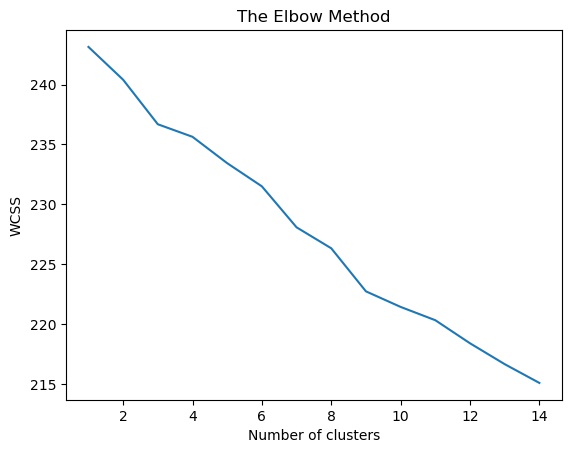

In [76]:
# Определяем кол-во кластеров для метода K-means
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
df0.head(10)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Лематизированный текст,Токенизированный текст,Токенизированный текст 2,Токенизированный текст 3,Кластер
15,Матрица,1999,2h 16m,Когда прекрасный незнакомец приводит компьютер...,8.7,"United States, Australia","Action, Sci-Fi",когда прекрасный незнакомец приводит компьютер...,когда прекрасный незнакомец приводить компьюте...,прекрасный незнакомец приводить компьютерный х...,незнакомец приводить компьютерный хакер нео за...,"[незнакомец, приводить, компьютерный, хакер, н...",0
20,Эта замечательная жизнь,1946,2h 10m,"Ангела посылают с небес, чтобы помочь отчаянно...",8.6,United States,"Drama, Family, Fantasy","ангела посылают с небес, чтобы помочь отчаянно...","ангела посылать с небо , чтобы помочь отчаянно...","ангела посылать небо , помочь отчаянно разочар...","посылать небо , помочь отчаянно разочаровать б...","[посылать, небо, ,, помочь, отчаянно, разочаро...",0
37,Отступники,2006,2h 31m,Полицейский под прикрытием и родинка в полиции...,8.5,"United States, Hong Kong","Crime, Drama, Thriller",полицейский под прикрытием и родинка в полиции...,полицейский под прикрытие и родинка в полиция ...,полицейский прикрытие родинка полиция пытаться...,полицейский прикрытие родинка полиция пытаться...,"[полицейский, прикрытие, родинка, полиция, пыт...",0
72,Амадей,1984,2h 40m,"Жизнь, успех и проблемы Вольфганг Амадея Моцар...",8.4,"United States, France","Biography, Drama, Music","жизнь, успех и проблемы вольфганг амадея моцар...","жизнь , успех и проблема вольфганг амадей моца...","жизнь , успех проблема вольфганг амадей моцарт...","жизнь , успех проблема вольфганг амадей , сказ...","[жизнь, ,, успех, проблема, вольфганг, амадей,...",0
78,Красота по-американски,1999,2h 2m,Сексуально разочарованный пригородный отец име...,8.3,United States,Drama,сексуально разочарованный пригородный отец име...,сексуально разочаровать пригородный отец иметь...,сексуально разочаровать пригородный отец иметь...,разочаровать пригородный отец иметь кризис сер...,"[разочаровать, пригородный, отец, иметь, кризи...",0
84,Три идиота,2009,2h 50m,Двое друзей ищут своего давно потерянного спут...,8.4,India,"Comedy, Drama",двое друзей ищут своего давно потерянного спут...,двое друг искать свой давно потерянный спутник...,двое друг искать давно потерянный спутник . во...,двое искать давно потерянный спутник . возвращ...,"[двое, искать, давно, потерянный, спутник, ., ...",0
93,Охота,2012,1h 55m,"Учитель живет одинокой жизнью, все время боряс...",8.3,"Denmark, Sweden, Belgium, France",Drama,"учитель живет одинокой жизнью, все время боряс...","учитель жить одинокий жизнь , всё время бороть...","учитель жить одинокий жизнь , время бороться о...","учитель жить одинокий , время бороться опека с...","[учитель, жить, одинокий, ,, время, бороться, ...",0
94,Вечное сияние чистого разума,2004,1h 48m,"Когда их отношения становятся кислыми, пара пр...",8.3,United States,"Drama, Romance, Sci-Fi","когда их отношения становятся кислыми, пара пр...","когда они отношение становиться кислый , пара ...","отношение становиться кислый , пара проходить ...","отношение становиться кислый , пара проходить ...","[отношение, становиться, кислый, ,, пара, прох...",0
128,Волк с Уолл-стрит,2013,3h 0m,Основываясь на истинной истории Джордана Белфо...,8.2,United States,"Biography, Comedy, Crime",основываясь на истинной истории джордана белфо...,основываться на истинный история джордан белфо...,основываться истинный история джордан белфорт ...,"истинный история джордан белфорт , подъём бога...","[истинный, история, джордан, белфорт, ,, подъё...",0
138,Всё о Еве,1950,2h 18m,"Казалось бы, робкая, но тайно безжалостная Инж...",8.2,United States,Drama,"казалось бы, робкая, но тайно безжалостная инж...","казаться бы , робкий , но тайно безжалостный и...","казаться , робкий , тайно безжалостный инжена ...",", робкий , тайно безжалостный инжена вмешаться...","[,, робкий, ,, тайно, безжалостный, инжена, вм...",0


In [87]:
gensim_dictionary = gensim.corpora.Dictionary(df0['Токенизированный текст 3'])

In [88]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df0['Токенизированный текст 3']]

In [89]:
lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [90]:
lda_5.print_topics()

[(0,
  '0.111*"," + 0.050*"." + 0.018*"хороший" + 0.018*"жизнь" + 0.012*"сын" + 0.012*"разочаровать" + 0.012*"иметь" + 0.007*"друг" + 0.007*"проникнуть" + 0.007*"родинка"'),
 (1,
  '0.066*"," + 0.028*"." + 0.015*"друг" + 0.015*"стареть" + 0.015*"пытаться" + 0.015*"глубоко" + 0.015*"жизнь" + 0.015*"вынудить" + 0.015*"профессор" + 0.015*"существование"'),
 (2,
  '0.004*"," + 0.004*"." + 0.004*"иметь" + 0.004*"формула" + 0.004*"сильный" + 0.004*"чрезвычайно" + 0.004*"гонщик" + 0.004*"предел" + 0.004*"толкать" + 0.004*"-1"'),
 (3,
  '0.088*"," + 0.040*"друг" + 0.031*"." + 0.012*"банда" + 0.012*"жизнь" + 0.011*"ронина" + 0.011*"приходить" + 0.011*"против" + 0.011*"освободить" + 0.011*"разделить"'),
 (4,
  '0.097*"," + 0.057*"." + 0.021*"друг" + 0.011*"жизнь" + 0.011*"воспоминание" + 0.011*"вьетнам" + 0.011*"война" + 0.006*"сын" + 0.006*"становиться" + 0.006*"маленький"')]

In [91]:
vis_20 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)

In [92]:
pyLDAvis.enable_notebook()

In [93]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.102007  0.047183       1        1  39.669244
0      0.108920  0.040229       2        1  35.775793
3     -0.004724 -0.093363       3        1  15.221378
1      0.000493  0.001924       4        1   8.286568
2     -0.002682  0.004026       5        1   1.047017, topic_info=          Term       Freq      Total Category  logprob  loglift
0            ,  35.000000  35.000000  Default  30.0000  30.0000
54        друг   6.000000   6.000000  Default  29.0000  29.0000
131    стареть   1.000000   1.000000  Default  28.0000  28.0000
36    пытаться   1.000000   1.000000  Default  27.0000  27.0000
42     глубоко   1.000000   1.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
36    пытаться   0.014983   1.572676   Topic5  -5.5305  -0.0944
95   разрушить   0.014982   1.917222   Topic5  -5.5305  -0.2925
8          мир   0.014982   1.916711   Topic5  -5.5305  -0.2923
42     глубоко   0.014982   1.572843   Topic5  -5.5305  -0.0945
97         сын   0.014982   2.625795   Topic5  -5.5305  -0.6070

[241 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         1  0.399134            ,
0         2  0.399134            ,
0         3  0.142548            ,
0         4  0.057019            ,
237       2  0.840272           -1
...     ...       ...          ...
61        2  0.766620      хороший
209       1  0.827350    целлюлоза
251       2  0.840406  чрезвычайно
18        2  0.839055   шокировать
38        2  0.839043        южный

[143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

In [94]:
df1 = df[df['Кластер']==1]

In [95]:
df1.head(10)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Лематизированный текст,Токенизированный текст,Токенизированный текст 2,Токенизированный текст 3,Кластер
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осудить за уксорицид , образовать дру...","банкир , осудить уксорицид , образовать дружба...","банкир , уксорицид , образовать дружба четверт...","[банкир, ,, уксорицид, ,, образовать, дружба, ...",1
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...,патриарх организовать криминальный династия пе...,"[патриарх, организовать, криминальный, династи...",1
6,Список Шиндлера,1993,3h 15m,В оккупированной немецкой Поль году во время В...,9.0,United States,"Biography, Drama, History",в оккупированной немецкой поль году во время в...,в оккупировать немецкий поль год в время второ...,оккупировать немецкий поль год время второй ми...,оккупировать немецкий поль год время второй ми...,"[оккупировать, немецкий, поль, год, время, вто...",1
8,Властелин колец: Братство кольца,2001,2h 58m,Крутый хоббит из Шира и восемь компаньонов отп...,8.9,"New Zealand, United States, United Kingdom","Adventure, Drama, Fantasy",крутый хоббит из шира и восемь компаньонов отп...,круть хоббит из шир и восемь компаньон отправи...,круть хоббит шир восемь компаньон отправиться ...,хоббит шир восемь компаньон отправиться путеше...,"[хоббит, шир, восемь, компаньон, отправиться, ...",1
17,Пролетая над гнездом кукушки,1975,2h 13m,Осенью 1963 года ветеран Корейской войны и пре...,8.7,United States,Drama,осенью 1963 года ветеран корейской войны и пре...,осень 1963 год ветеран корейский война и прест...,осень 1963 год ветеран корейский война преступ...,1963 год ветеран корейский война преступник ум...,"[1963, год, ветеран, корейский, война, преступ...",1
21,Семь самураев,1954,3h 27m,"Фермеры из деревни, эксплуатируемой бандитами,...",8.6,Japan,"Action, Drama","фермеры из деревни, эксплуатируемой бандитами,...","фермер из деревня , эксплуатировать бандит , н...","фермер деревня , эксплуатировать бандит , нани...","фермер деревня , эксплуатировать бандит , нани...","[фермер, деревня, ,, эксплуатировать, бандит, ...",1
25,Зелёная миля,1999,3h 9m,"Смертельный охранник узнает, что нежный гигант...",8.6,United States,"Crime, Drama, Fantasy","смертельный охранник узнает, что нежный гигант...","смертельный охранник узнать , что нежный гиган...","смертельный охранник узнать , нежный гигант ат...","охранник узнать , нежный гигант атака обладать...","[охранник, узнать, ,, нежный, гигант, атака, о...",1
28,Звёздные войны: Эпизод 4 - Новая надежда,1977,2h 1m,Люк Скайуокер объединяет усилия с рыцарем-джед...,8.6,United States,"Action, Adventure, Fantasy",люк скайуокер объединяет усилия с рыцарем-джед...,люк скайуокер объединять усилие с рыцарь-джеда...,люк скайуокер объединять усилие рыцарь-джедай ...,люк скайуокер объединять усилие рыцарь-джедай ...,"[люк, скайуокер, объединять, усилие, рыцарь-дж...",1
31,Пианист,2002,2h 30m,Во время Второй мировой войны известный польск...,8.5,"France, Poland, Germany, United Kingdom, Unite...","Biography, Drama, Music",во время второй мировой войны известный польск...,в время второй мировой война известный польски...,время второй мировой война известный польский ...,второй мировой война известный польский музыка...,"[второй, мировой, война, известный, польский, ...",1
36,Могила светлячков,1988,1h 28m,Молодой мальчик и его младшая сестра изо всех ...,8.5,Japan,"Animation, Drama, War",молодой мальчик и его младшая сестра изо всех ...,молодой мальчик и он младший сестра из весь си...,молодой мальчик младший сестра весь сила пытат...,мальчик младший сестра весь сила пытаться выжи...,"[маль

# Наименоване кластера